In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)  

In [2]:
df = pd.read_csv('./data/fut19.csv')

/home/carloscba/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['player_ID', 'player_name', 'player_extended_name', 'quality',
       'revision', 'origin', 'overall', 'club', 'league', 'nationality',
       'position', 'age', 'date_of_birth', 'height', 'weight', 'intl_rep',
       'added_date', 'pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning', 'pref_foot', 'att_w

In [4]:
leagues = df.league.unique()
display(leagues)

array(['Icons', 'Serie A TIM', 'Bundesliga', 'Premier League',
       'LaLiga Santander', 'Liga NOS', 'Ligue 1 Conforama', 'Süper Lig',
       'EFL Championship', 'LaLiga 1 I 2 I 3', 'Hellas Liga',
       'League of Russia', 'Ukrayina Liha', 'Eredivisie', 'Bundesliga 2',
       'LIGA Bancomer MX', 'SAF', 'Belgium Pro League',
       'Raiffeisen Super League', 'Major League Soccer',
       'Scottish Premiership', 'Calcio B', 'Saudi Professional League',
       'Liga Dimayor', 'EFL League One', 'Česká Liga',
       'Campeonato Scotiabank', 'South African FL', 'Allsvenskan',
       'Hyundai A-League', 'Domino’s Ligue 2', 'Superliga', 'Ekstraklasa',
       'Österreichische Fußball-Bundesliga', 'K LEAGUE Classic',
       'Meiji Yasuda J1 League', '3. Liga', 'Eliteserien',
       'EFL League Two', 'Finnliiga', 'SSE Airtricity League', 'CSL',
       'Liga Hrvatska'], dtype=object)

In [5]:
myLeague = 'Serie A TIM'

In [6]:
leaguePlayers = df.loc[(df['league'] == myLeague)]

leaguePlayers.head()

,player_ID,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,rf,lf,rw,lw,st,price_ps4,price_xbox,price_pc,traits,specialties
142,143,Ronaldo,C. Ronaldo dos Santos Aveiro,Gold - Rare,Normal,NaN,94,Juventus,Serie A TIM,Portugal,...,91.0,91,90,90,92,2059000.0,2087000.0,2999000.0,"Power Free-Kick, Flair","Speedster, Dribbler, Distance Shooter, Acrobat, Clinical Finisher, Complete Forward, Poacher"
143,144,Chiellini,Giorgio Chiellini,Gold - Rare,NaN,NaN,90,Juventus,Serie A TIM,Italy,...,55.0,55,55,55,58,218000.0,249000.0,225000.0,"Long Throw-In, Injury Prone, Avoids Using Weaker Foot, Power Header","Tackler, Tactician, Strength, Complete Defender"
144,145,Dybala,Paulo Dybala,Gold - Rare,NaN,NaN,90,Juventus,Serie A TIM,Argentina,...,87.0,87,88,88,84,645000.0,710000.0,595000.0,"Avoids Using Weaker Foot, Finesse Shot, Flair, Set Play Specialist, Takes Finesse Free Kicks","Dribbler, Play Maker, FK Specialist, Acrobat, Midfielder"
145,146,Chiellini,Giorgio Chiellini,Gold - Rare,Normal,NaN,89,Juventus,Serie A TIM,Italy,...,55.0,55,55,55,58,66000.0,60000.0,82000.0,"Long Throw-In, Injury Prone, Avoids Using Weaker Foot, Power Header","Tackler, Tactician, Strength, Complete Defender"
146,147,Dybala,Paulo Dybala,Gold - Rare,Normal,NaN,89,Juventus,Serie A TIM,Argentina,...,87.0,87,87,87,83,270000.0,253000.0,297000.0,"Avoids Using Weaker Foot, Finesse Shot, Flair, Set Play Specialist, Takes Finesse Free Kicks","Dribbler, Play Maker, FK Specialist, Acrobat, Midfielder"


Busco el jugador de referencia

In [11]:
targetPlayerName = 'Gonzalo Higuaín'

targetPlayer = leaguePlayers.loc[(leaguePlayers['player_extended_name'] == targetPlayerName) & (leaguePlayers['revision'] == 'Normal'), ['player_name']]

targetPlayer.head()

,player_name
650,Higuaín


In [8]:
#'shoot_positioning', 'shoot_finishing', 'shoot_shot_power'
skillsValues = np.array([targetPlayer.shoot_positioning.values, targetPlayer.shoot_finishing.values, targetPlayer.shoot_shot_power.values, targetPlayer.shoot_long_shots.values]).mean()
skillsValues

87.5

In [9]:
np.array([leaguePlayers.shoot_positioning.values, leaguePlayers.shoot_finishing.values, leaguePlayers.shoot_shot_power.values, leaguePlayers.shoot_long_shots.values]).mean()

56.15581395348837

In [12]:
leaguePlayers['overall'].describe()

count    645.000000
mean     75.271318 
std      6.712314  
min      52.000000 
25%      71.000000 
50%      75.000000 
75%      80.000000 
max      95.000000 
Name: overall, dtype: float64

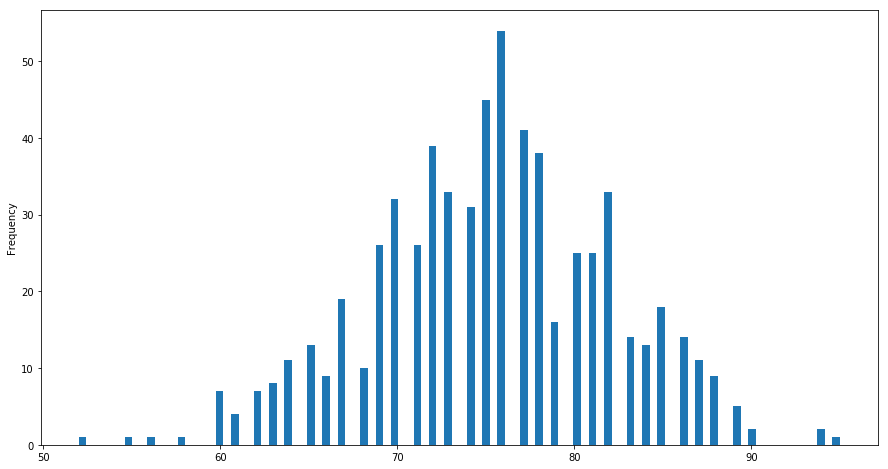

In [16]:
leaguePlayers['overall'].plot(kind = 'hist', bins = 100, figsize=(15,8))

## Jugadores con características de definición similares a Higuain y un precio menor a 25000 monedas

In [10]:
playersToScout = leaguePlayers.loc[(
    ((leaguePlayers.shoot_positioning + leaguePlayers.shoot_finishing + leaguePlayers.shoot_shot_power + leaguePlayers.shoot_long_shots) / 4 >= (skillsValues - 5))
    &
    (leaguePlayers.price_ps4 < 25000)
)]

playersToScout.append(targetPlayer)

playersToScout.head().T

,722,786,2604,2696
player_ID,739,806,2679,2774
player_name,Milik,Džeko,Quagliarella,Ilicic
player_extended_name,Arkadiusz Milik,Edin Džeko,Fabio Quagliarella,Josip Ilicic
quality,Gold - Rare,Gold - Rare,Gold - Rare,Gold - Rare
revision,NaN,Normal,Normal,Normal
origin,NaN,NaN,NaN,NaN
overall,81,85,80,81
club,Napoli,Roma,Sampdoria,Atalanta
league,Serie A TIM,Serie A TIM,Serie A TIM,Serie A TIM
nationality,Poland,Bosnia and Herzegovina,Italy,Slovenia
